# OpenSim Scripting in Python
This is replicating quick tutorial for Scripting in Python using OpenColab.

[This link](https://simtk-confluence.stanford.edu:8443/display/OpenSim/Scripting+in+Python) is being replicated to show how simple one can use OpenColab to learn and do reserach with minimal setup (in fact <1 min) and about 7min installation OpenSim on the web.


For instance, see what OpenSim needs configratuon as mentioned by the deveklopmers:

*"Python scripting is available from OpenSim 3.2, onward. Starting with 4.0, OpenSim is distributed as 64-bit only, so you must use 64-bit Python. If you are using 4.0, you need Python 2.7.x. If you are using 4.1 or 4.2, you need Python 3.7.x.*

*Python version 3.8 is not supported for OpenSim version 4.2 or earlier; please use Python version 3.7 or earlier. Python version 3.8 is supported for OpenSim version 4.3+. "*

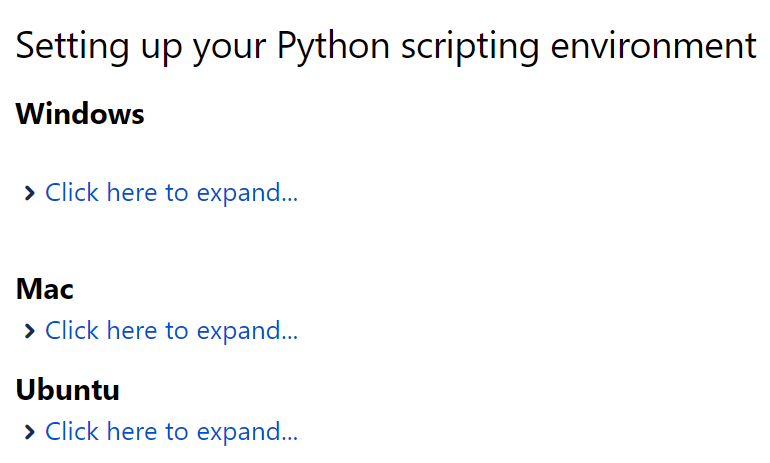


In [ ]:
#@title Step 1: Install OpenSim package from link above & other dependency packages
import time
start_time = time.time()
!pip uninstall -y -q plotly; pip install -q plotly
!pip uninstall -y -q pandas; pip install -q pandas
import pandas as pd 
import plotly
pd.set_option('plotting.backend','plotly')
def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)
get_ipython().events.register('pre_run_cell', enable_plotly_in_cell)
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
!conda install -y --prefix /usr/local -c ember123 opencolab
!apt-get update -y
!apt-get install -y x11-apps
!apt install mesa-utils 
!apt-get install xvfb x11-utils
!pip install pyvirtualdisplay
from pyvirtualdisplay import Display
Display(visible=0, size=(1400, 900)).start()
!pip install c3d
!pip install numpy --upgrade
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel
!pip install tensorflow==2.0.0.alpha0
!conda install -c plotly -y plotly-orca
!pip install svgutils
!apt install libadolc2
!apt-get install coinor-libipopt-dev 
import opensim as osim
print('OpenSim Version Installed is version:',osim.__version__)
print(f'The execution time of OpenSim Package Installation is {(time.time() - start_time)} sec')

#Introduction to Python
Python is a widely used general purpose programming language. Python is free and open source, with a large user community that encourages sharing and user contributions. The Python language is very flexible, supporting object-oriented and procedural styles of computing. The Python design philosophy also emphasizes code readability which makes sharing and using code easier than with some other languages. 

Those from scientific and engineering backgrounds who are new to Python should check out the following resources to help get started with the language:

Python wikipedia
python.org
Python vs Matlab
Google Python classes
Python style guide (PEP8)
Structuring a Python project

#Note on Python 2 vs Python 3
The Python package that comes with the OpenSim GUI distribution up to version 4.0 will only work with Python 2.7.x. OpenSim version 4.1 distribution upgrades to support Python version 3.7. If you want a different python version, you must build the OpenSim API (opensim-core) from scratch and set the CMake variable OPENSIM_PYTHON_VERSION to the desired version (2 or 3). In all text below that refers to Python version 2.7 (for versions 4.0 and earlier) the same applies to Python version 3 for version 4.1 and later.

# Available Example Scripts
Scripts can are located in the OpenSim distribution in the sdk/Scripts/Python folder. 


build_simple_arm_model.py	This script generates a simple arm model, runs a simulation, and visualizes the results.
wiring_inputs_and_outputs_with_TableReporter.py	This script shows how to write model outputs (the position of a body) to a data file.

#Pythonic extensions of the OpenSim API
We have add some pythonic aspects to our Python interface. All examples assume that you have already imported the opensim package ("import opensim").

In [ ]:
# Initializing a Vector from a Python list
v = osim.Vector([6, 7, 8, 9]) 
rv = osim.RowVector([1, 2, 5])


In [ ]:
# Accessing elements of VecX and Vector using brackets
v = osim.Vec3(1, 2, 3)
v[0] = 1.5 + v[1]
w = osim.Vector(5, 1.5)
w[0] = 3 * w[1]

In [ ]:
# Printing the contents of a VecX or Vector
v = osim.Vec3(1, 2, 3)
print(v)
# outcome ~[1,2,3]

In [ ]:
# Getting the length of a VecX or Vector
# You can use the built-in python function len() on VecX (e.g., Vec3) and Vector:
w = osim.Vector(5)
if len(w) < 5:
    raise Exception()

In [ ]:
# Iterate over elements of any Set
# There are two iterators: one that treats the Set like a python list, and another that treats the Set like a python dict:
# !git clone git@github.com:hmok/OpenColab.git #make this avaiabe later as this is private now
# model = osim.Model("my_model.osim")
model = osim.Model("/content/gait2354_simbody.osim")
for force in model.getForceSet():
    print(force.getName())
# for name, muscle in model.getMuscles():
#     print(name, muscle.get_max_isometric_force())

In [ ]:
# Iterate over all bodies in a model (even bodies not in the model's BodySet)

model = osim.Model("my_model.osim") #change this name to match and make sure the fie exist here.
for body in model.getBodyList():
    print(body.getName())